# Chapter 7. 머신러닝 데이터 분석

## 1. 머신러닝(Machine Learning) 개요
### 1-1. 머신러닝이란?
* 기계 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
* 예측(Prediction), 분류(Classification), 군집(Clustering)

### 1-2. 지도 학습 vs 비지도 학습
#### 지도학습 (Supervised Learning)
* 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식  

#### 비지도 학습 (Unsupervised Learning)
* 정답 데이터 없이 컴퓨터 알고리즘이 스스로 데이터로부터 숨은 패턴을 찾아내는 방식  
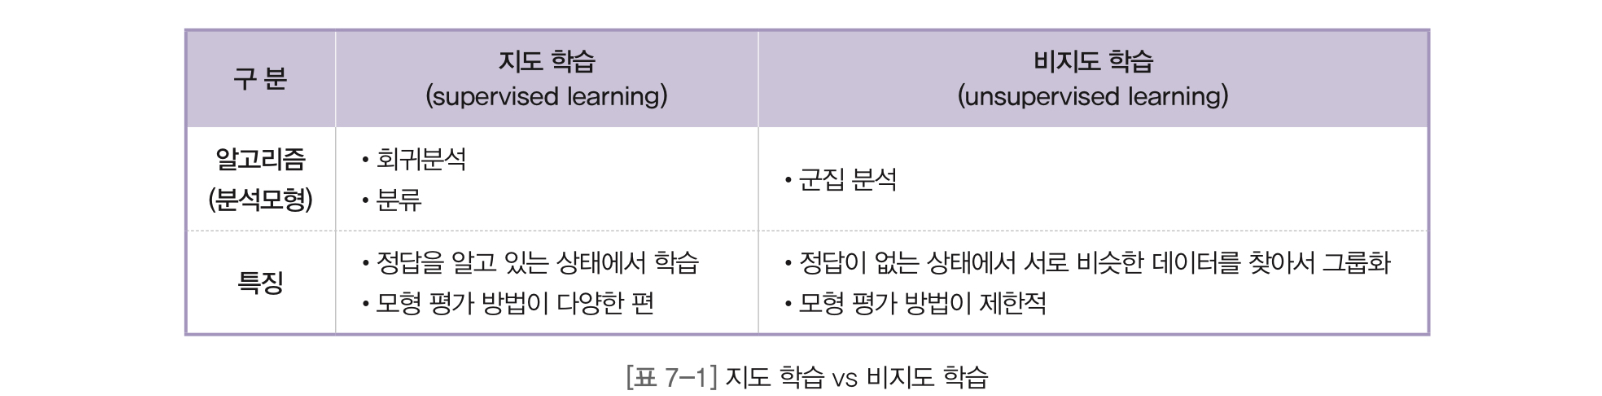

### 1-3. 머신러닝 프로세스
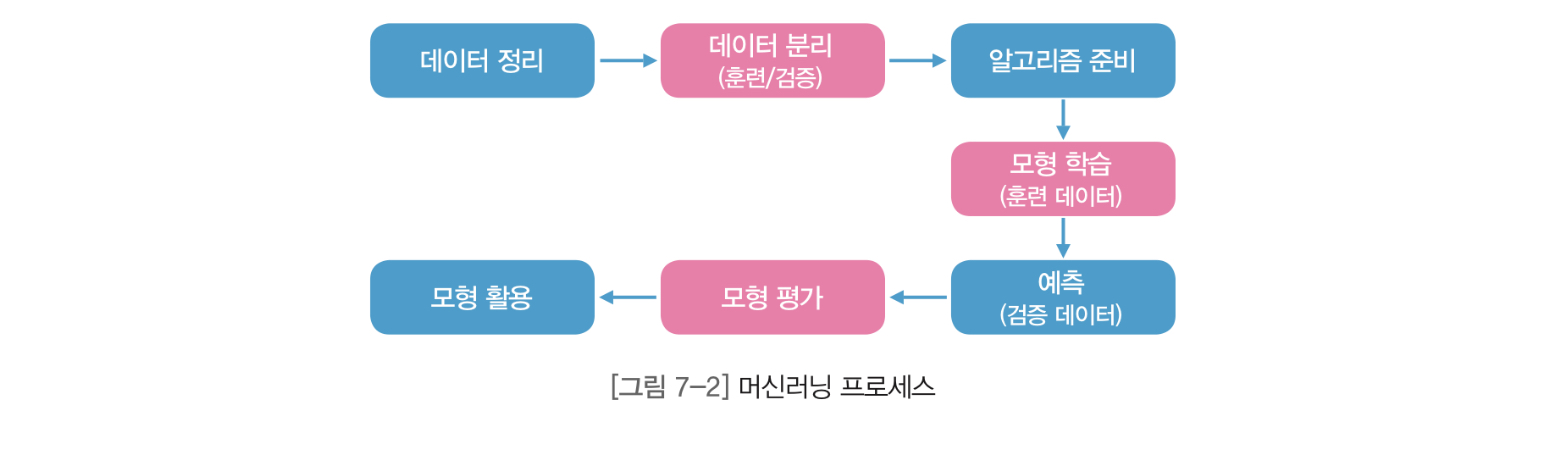

* 머신러닝 데이터 분석을 시작하기 전에 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터 변환
* 분석 대상에 관해 수집한 관측값을 속성을 기준으로 정리 → 판다스 활용
* df의 열이 데이터의 속성을 나타내는 변수 / df의 행이 하나의 관측값  

* 컴퓨터가 이해할 수 있도록 데이터프레임으로 변환 후, 속성간의 관계를 분석하여 결과를 예측하는 모형을 학습을 통해 찾음
* 훈련 데이터(Train Data): 모형 학습에 사용 되는 데이터 / 검증 데이터(Test Data): 학습을 마친 모형의 예측 평가에 사용 되는 데이터

## 2. 회귀(Regression) 분석
* 가장 간단한 알고리즘
* 가격, 매출, 주가, 환율, 수량 등 연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용
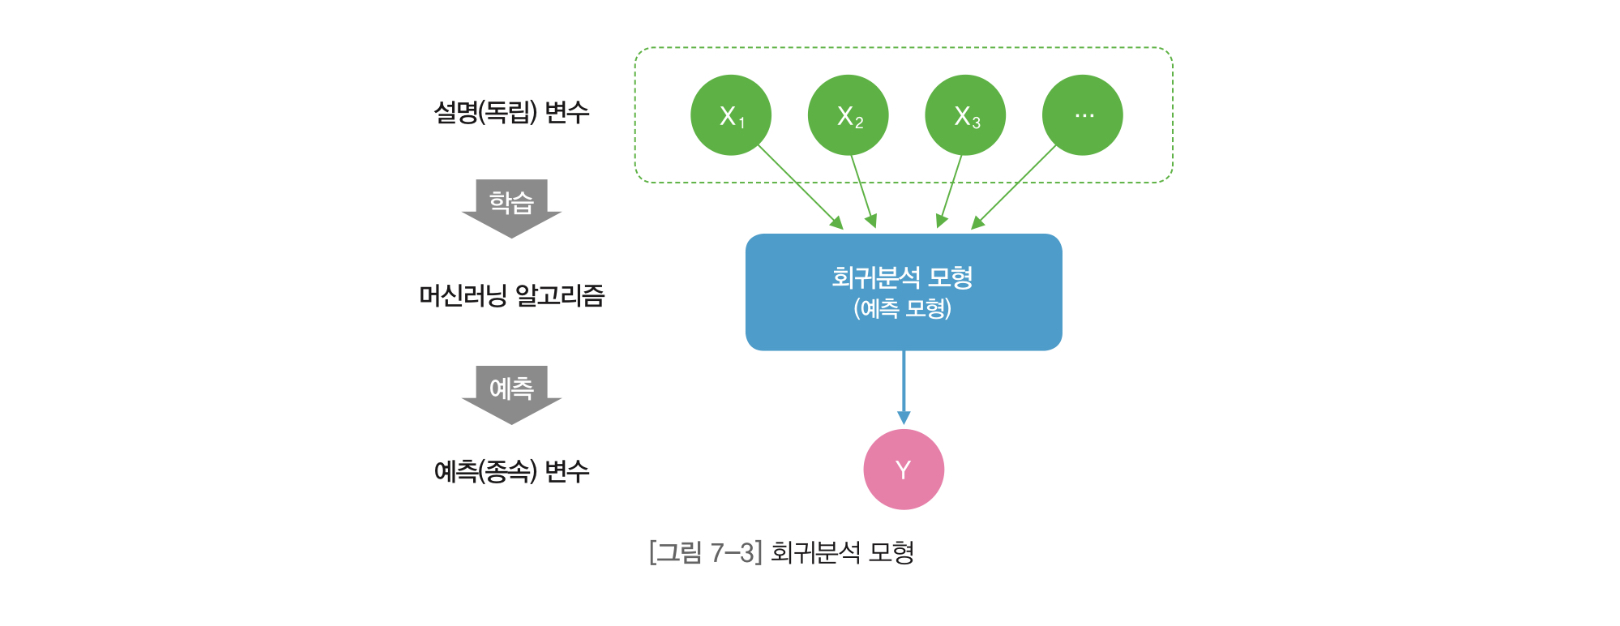

### 2-1. 단순 회귀 분석 (Simple Linear Regression)
* "소득 증가 → 소비 증가" 같은 어떤 변수(독립 변수 X)가 다른 변수(종속 변수 Y)에 영향을 주는 관계 : 선형관계
* 두 변수 사이에 일대일 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
* 대표적인 지도학습 유형
* y = ax+b

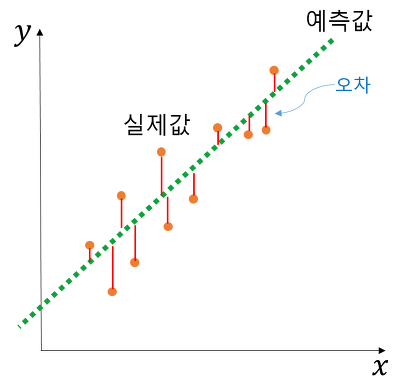

#### Step 1. 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)

In [ ]:
# 데이터 살펴보기


#### Step 2. 데이터 탐색

In [ ]:
# 데이터 자료형 확인
# info() 활용



In [ ]:
# 데이터 통계 요약정보 확인
# describe() 활용


* horsepower 열의 자료형 변경 (문자열 ->숫자)

In [ ]:
# horsepower 열의 고유값 확인
# unique() 활용


In [ ]:
# '?'을 np.nan으로 변경
# replace 메서드 활용


In [ ]:
# 누락데이터 행을 삭제
# dropna 메서드 활용 / subset 옵션 = ['horesepower'], axis=0


In [ ]:
# 문자열을 실수형으로 변환


In [ ]:
# 데이터 통계 요약정보 확인


#### Step 3. 속성(feature/variable) 선택

In [ ]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)

# ndf 

In [ ]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
# plot() 메서드 / 옵션: kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5)


# ndf


In [ ]:
# seaborn으로 산점도 그리기
# figsize=(10, 5)
# fig   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# sns의 regplot 메서드 활용
# ax1 옵션: x='weight', y='mpg', data=ndf, ax=ax1
# ax2 옵션: x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False



In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
# sns의 jointplot 메서드 활용
# 첫번째 그래프 옵션: x='weight', y='mpg', data=ndf
# 두번째 그래프 옵션: x='weight', y='mpg', kind='reg', data=ndf



In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
# pairplot 메서드

#### Step 4. 데이터 셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

#### Step 5. 단순휘귀분석 모형 - sklearn 사용

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)


In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

### 2-2. 다항회귀분석 (Polynomial Regression)
* 2차 함수 이상의 다항 함수로 설명하는 알고리즘
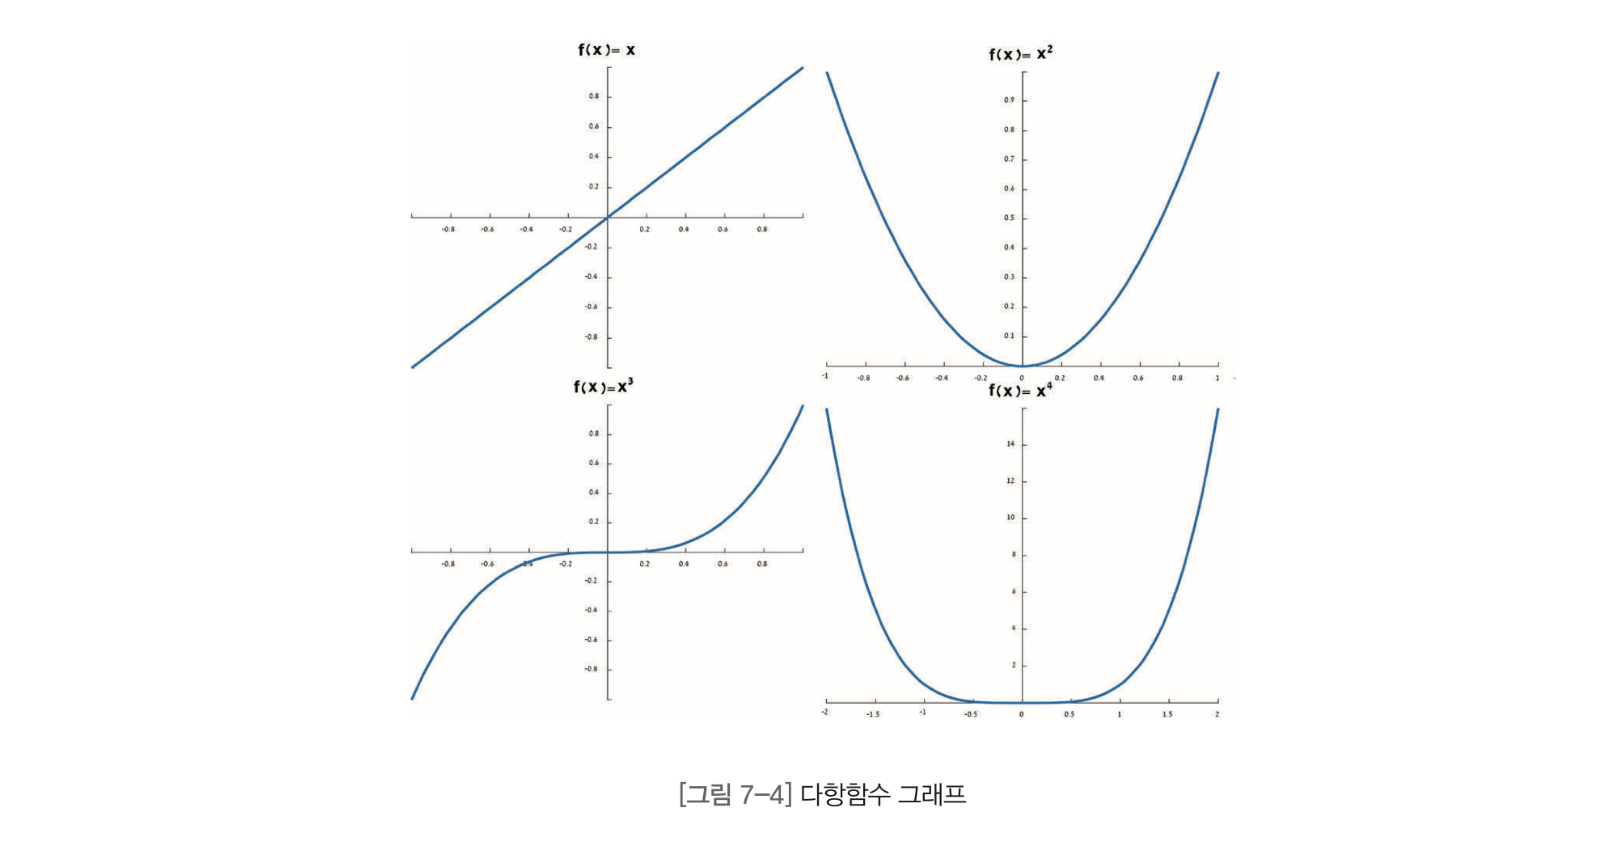

#### 데이터 준비

In [ ]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')

#### 비선형회귀분석 모형

In [ ]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환
# PolynomialFeatures 메서드 / 옵션 :degree=2 

# poly 

In [ ]:
#X_train 데이터를 2차항으로 변형

# X_train_poly

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

In [ ]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

### 2-3. 다중회귀분석 (Multivariate Regression)
* 2개 이상의 독립 변수가 종속 변수에 영향을 주는 알고리즘

#### 데이터 준비

In [ ]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)   

#### 다중회귀분석 모형 

In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R-제곱 점수:', r_square)

# 회귀식의 기울기
print('X 변수의 계수 a:', lr.coef_)

# 회귀식의 y절편
print('상수항 b:', lr.intercept_)

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()